In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray();
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, Flatten, Dropout, SpatialDropout2D
from keras.optimizers import SGD
from keras.models import Sequential
import numpy as np
from skimage.data import camera, chelsea, astronaut
from skimage.exposure import equalize_hist, equalize_adapthist
import skimage.filters
from skimage.color import rgb2gray
from skimage.transform import resize 
from transforms import unsharp_mask #sharpened = original + (original − blurred) × amount
from functools import partial
from utils import display_transforms
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
imsize = 32
(cifar_train, cifar_train_labels), (cifar_test, cifar_test_labels) = cifar10.load_data()
cifar_train, cifar_test = rgb2gray(cifar_train), rgb2gray(cifar_test)
test_images = [resize(rgb2gray(im), (imsize, imsize)) for im in (camera(), chelsea(), astronaut())]

ops = {
    'Histogram Equalization': equalize_hist,
    'Adaptive Histogram Equalization': partial(equalize_adapthist, kernel_size=imsize//4),
    'Unsharp mask': unsharp_mask
}

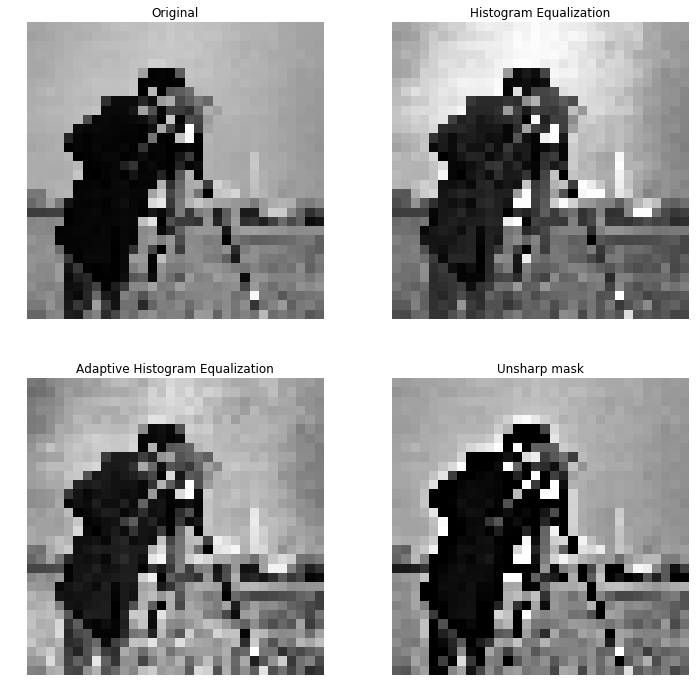

In [3]:
display_transforms(test_images[0], ops)

In [4]:
optimizer = SGD(lr=0.2, momentum=0.01)
MLP = Sequential([
    Flatten(input_shape=(imsize,imsize,1)),
    Dense(512, activation='relu'),
    Dropout(rate=0.1),
    Dense(imsize**2, activation='tanh')
])

CNN = Sequential([
    Conv2D(4, kernel_size=5, input_shape=(imsize,imsize,1), activation='relu'),
    Conv2D(8, kernel_size=5, activation='relu'),
    Conv2D(16, kernel_size=5, activation='relu'),
    SpatialDropout2D(rate=0.1),
    Flatten(),
    Dense(imsize**2, activation='tanh')
])

MLP.compile(optimizer=optimizer, loss='mse')
CNN.compile(optimizer=optimizer, loss='mse')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
cifar_ahe = np.array([ops['Adaptive Histogram Equalization'](im) for im in cifar_train])

In [6]:
#Add single channel additional dimension
c_train = np.expand_dims(cifar_train, 3)
ahe_target = np.expand_dims(cifar_ahe, 3).reshape(cifar_ahe.shape[0], -1)

#normalize in -1,1
c_train = 2*((c_train - c_train.min())/(c_train.max() - c_train.min())) - 1
ahe_target = 2*((ahe_target - ahe_target.min())/(ahe_target.max() - ahe_target.min())) - 1

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 10s 256us/step - loss: 0.2848 - val_loss: 0.2418
Epoch 2/200
40000/40000 [==============================] - 12s 291us/step - loss: 0.2365 - val_loss: 0.2175
Epoch 3/200
40000/40000 [==============================] - 10s 243us/step - loss: 0.2178 - val_loss: 0.2028
Epoch 4/200
40000/40000 [==============================] - 8s 200us/step - loss: 0.2050 - val_loss: 0.1917
Epoch 5/200
40000/40000 [==============================] - 8s 199us/step - loss: 0.1950 - val_loss: 0.1827
Epoch 6/200
40000/40000 [==============================] - 8s 199us/step - loss: 0.1868 - val_loss: 0.1753
Epoch 7/200
40000/40000 [==============================] - 8s 202us/step - loss: 0.1800 - val_loss: 0.1689
Epoch 8/200
40000/40000 [==============================] - 8s 200us/step - loss: 0.1741 - val_loss: 0.1635
Epoch 9/200
40000/40000 [==============================] - 8s 201us/step - loss: 0.1690 - v

40000/40000 [==============================] - 8s 189us/step - loss: 0.0860 - val_loss: 0.0761
Epoch 77/200
40000/40000 [==============================] - 8s 189us/step - loss: 0.0856 - val_loss: 0.0757
Epoch 78/200
40000/40000 [==============================] - 8s 188us/step - loss: 0.0852 - val_loss: 0.0754
Epoch 79/200
40000/40000 [==============================] - 8s 191us/step - loss: 0.0849 - val_loss: 0.0750
Epoch 80/200
40000/40000 [==============================] - 8s 189us/step - loss: 0.0846 - val_loss: 0.0747
Epoch 81/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0842 - val_loss: 0.0743
Epoch 82/200
40000/40000 [==============================] - 8s 189us/step - loss: 0.0839 - val_loss: 0.0740
Epoch 83/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0836 - val_loss: 0.0737
Epoch 84/200
40000/40000 [==============================] - 8s 191us/step - loss: 0.0833 - val_loss: 0.0733
Epoch 85/200
40000/40000 [===============

40000/40000 [==============================] - 8s 190us/step - loss: 0.0711 - val_loss: 0.0603
Epoch 152/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0709 - val_loss: 0.0601
Epoch 153/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0709 - val_loss: 0.0601
Epoch 154/200
40000/40000 [==============================] - 8s 189us/step - loss: 0.0708 - val_loss: 0.0599
Epoch 155/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0707 - val_loss: 0.0598
Epoch 156/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0705 - val_loss: 0.0597
Epoch 157/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0705 - val_loss: 0.0596
Epoch 158/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0704 - val_loss: 0.0595
Epoch 159/200
40000/40000 [==============================] - 8s 190us/step - loss: 0.0702 - val_loss: 0.0594
Epoch 160/200
40000/40000 [======

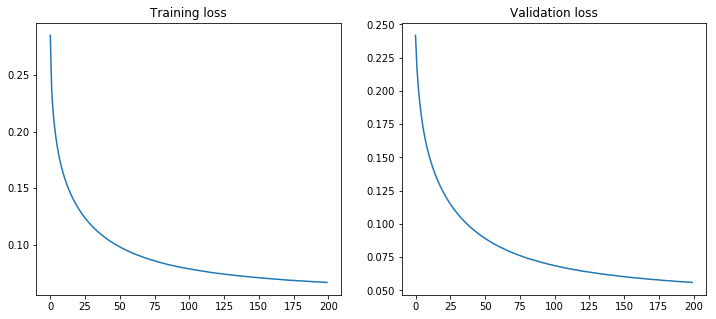

In [7]:
mlp_history = MLP.fit(c_train, ahe_target, batch_size=128, epochs=200, validation_split=0.2)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'])
plt.title('Training loss')
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['val_loss'])
plt.title('Validation loss');

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 120s 3ms/step - loss: 0.2857 - val_loss: 0.2839
Epoch 2/200
40000/40000 [==============================] - 94s 2ms/step - loss: 0.2775 - val_loss: 0.2580
Epoch 3/200
40000/40000 [==============================] - 94s 2ms/step - loss: 0.2453 - val_loss: 0.2170
Epoch 4/200
40000/40000 [==============================] - 94s 2ms/step - loss: 0.2072 - val_loss: 0.1844
Epoch 5/200
40000/40000 [==============================] - 94s 2ms/step - loss: 0.1853 - val_loss: 0.1684
Epoch 6/200
40000/40000 [==============================] - 158s 4ms/step - loss: 0.1719 - val_loss: 0.1567
Epoch 7/200
40000/40000 [==============================] - 274s 7ms/step - loss: 0.1619 - val_loss: 0.1480
Epoch 8/200
40000/40000 [==============================] - 173s 4ms/step - loss: 0.1549 - val_loss: 0.1409
Epoch 9/200
40000/40000 [==============================] - 207s 5ms/step - loss: 0.1493 - val_loss

40000/40000 [==============================] - 94s 2ms/step - loss: 0.0811 - val_loss: 0.0690
Epoch 77/200
40000/40000 [==============================] - 130s 3ms/step - loss: 0.0810 - val_loss: 0.0716
Epoch 78/200
40000/40000 [==============================] - 93s 2ms/step - loss: 0.0808 - val_loss: 0.0683
Epoch 79/200
40000/40000 [==============================] - 99s 2ms/step - loss: 0.0802 - val_loss: 0.0688
Epoch 80/200
40000/40000 [==============================] - 133s 3ms/step - loss: 0.0804 - val_loss: 0.0709
Epoch 81/200
40000/40000 [==============================] - 92s 2ms/step - loss: 0.0800 - val_loss: 0.0681
Epoch 82/200
40000/40000 [==============================] - 106s 3ms/step - loss: 0.0794 - val_loss: 0.0692
Epoch 83/200
40000/40000 [==============================] - 163s 4ms/step - loss: 0.0796 - val_loss: 0.0673
Epoch 84/200
40000/40000 [==============================] - 99s 2ms/step - loss: 0.0790 - val_loss: 0.0670
Epoch 85/200
40000/40000 [====================

Epoch 152/200
40000/40000 [==============================] - 94s 2ms/step - loss: 0.0688 - val_loss: 0.0629
Epoch 153/200
40000/40000 [==============================] - 95s 2ms/step - loss: 0.0685 - val_loss: 0.0577
Epoch 154/200
40000/40000 [==============================] - 132s 3ms/step - loss: 0.0689 - val_loss: 0.0571
Epoch 155/200
40000/40000 [==============================] - 92s 2ms/step - loss: 0.0686 - val_loss: 0.0612
Epoch 156/200
40000/40000 [==============================] - 98s 2ms/step - loss: 0.0682 - val_loss: 0.0588
Epoch 157/200
40000/40000 [==============================] - 133s 3ms/step - loss: 0.0685 - val_loss: 0.0564
Epoch 158/200
40000/40000 [==============================] - 93s 2ms/step - loss: 0.0679 - val_loss: 0.0567
Epoch 159/200
40000/40000 [==============================] - 96s 2ms/step - loss: 0.0683 - val_loss: 0.0561
Epoch 160/200
40000/40000 [==============================] - 94s 2ms/step - loss: 0.0680 - val_loss: 0.0567
Epoch 161/200
40000/40000 

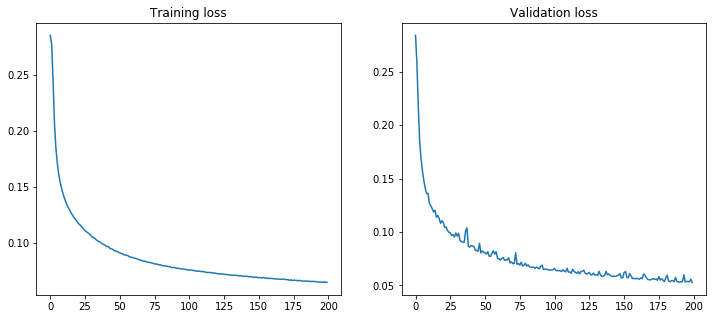

In [8]:
cnn_history = CNN.fit(c_train, ahe_target, batch_size=128, epochs=200, validation_split=0.2)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'])
plt.title('Training loss')
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['val_loss'])
plt.title('Validation loss');